In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # pylint: disable=import-error, no-name-in-module
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex
import numpy as np
from qiskit import assemble
from math import pi
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

## Quantum Fourier Transform (QFT)

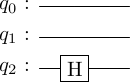

In [16]:
qc = QuantumCircuit(3)
qc.h(2)
qc.draw(output="latex")

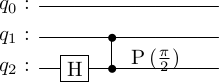

In [3]:
# Next, we want to turn this an extra quarter turn if qubit 1 is in the state  |1⟩
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.draw(output="latex")

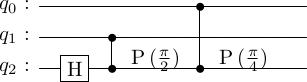

In [4]:
# And another eighth turn if the least significant qubit (0) is  |1⟩
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.draw(output="latex")

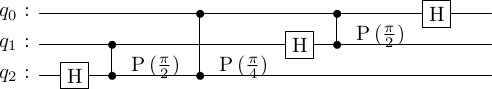

In [5]:
# With that qubit taken care of, we can now ignore it and repeat the process, using the same logic for qubits 0 and 1:
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.draw(output="latex")

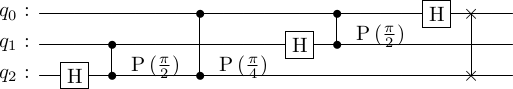

In [6]:
# Finally we must swap the qubits 0 and 2 to complete the QFT:

qc.swap(0,2)
qc.draw(output="latex")

## General QFT Function

In [7]:
def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation: 
        circuit.cp(pi/2**(n-qubit), qubit, n)

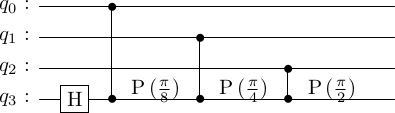

In [8]:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw(output="latex")

In [9]:
from qiskit_textbook.widgets import scalable_circuit
scalable_circuit(qft_rotations)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xfb\x00\x00\x01\x08\x08\x06\x00\x00\x00X\x8d]e\x…

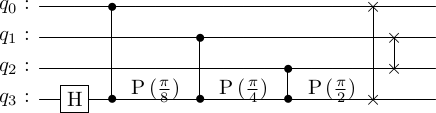

In [10]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw(output="latex")

In [11]:
bin(5)

'0b101'

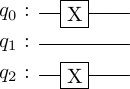

In [12]:
# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(2)
qc.draw(output="latex")

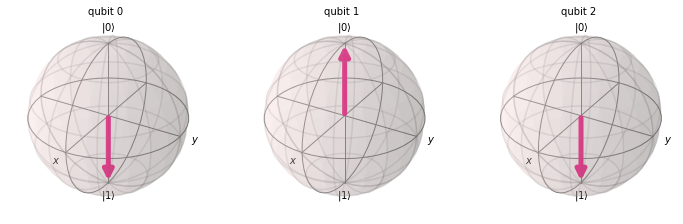

In [13]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

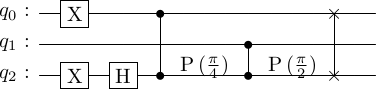

In [14]:
qft(qc,3)
qc.draw(output="latex")

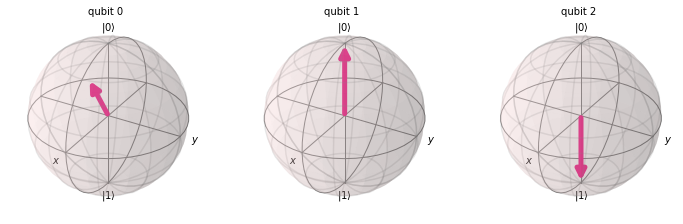

In [15]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)